In [2]:
!pip install wordcloud


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install textblob


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import plotly.figure_factory as ff
from textblob import TextBlob
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
path = 'C:/Users/Korhan/Desktop/workspace/vsCodeWorkspace/Python_Workspace/mental_health_sentiment_analysis/Combined Data.csv'
df = pd.read_csv(path)

In [3]:
df.head()

Unnamed: 0                                          statement   status
0           0                                         oh my gosh  Anxiety
1           1  trouble sleeping, confused mind, restless hear...  Anxiety
2           2  All wrong, back off dear, forward doubt. Stay ...  Anxiety
3           3  I've shifted my focus to something else but I'...  Anxiety
4           4  I'm restless and restless, it's been a month n...  Anxiety

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  53043 non-null  int64 
 1   statement   52681 non-null  object
 2   status      53043 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [5]:
print("Missing Values : ")
print(df.isnull().sum())

Missing Values : 
Unnamed: 0      0
statement     362
status          0
dtype: int64


In [6]:
fig=px.histogram(df, x='status', title='Distribution of Mental Health Status')
fig.show()

In [7]:
# Handling NaN Values
df['statement'] = df['statement'].fillna('')

In [8]:
# Text Length Distribution
df['text_length'] = df['statement'].apply(lambda x: len(str(x).split()))
fig = px.histogram(df, x='text_length', title='Text Length Distribution')
fig.show()

In [9]:
# Data Preprocessing
nltk.download('stopwords')
nltk.download('punkt')

def preprocess_text(text):
    text = text.lower()  # Lowercase text
    text = re.sub(r'\[.*?\]', '', text)  # Remove text in square brackets
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove links
    text = re.sub(r'<.*?>+', '', text)  # Remove HTML tags
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
    text = re.sub(r'\n', '', text)  # Remove newlines
    text = re.sub(r'\w*\d\w*', '', text)  # Remove words containing numbers
    return text

df['cleaned_statement'] = df['statement'].apply(lambda x: preprocess_text(x))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Korhan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Korhan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
# Tokenization and Stopwords Removal
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['cleaned_statement'] = df['cleaned_statement'].apply(lambda x: remove_stopwords(x))

In [11]:
# Data Augmentation
def augment_text(text):
    try:
        blob = TextBlob(text)
        translated = blob.translate(to='fr').translate(to='en')
        return str(translated)
    except Exception as e:
        return text

df['augmented_statement'] = df['statement'].apply(augment_text)
augmented_df = df[['statement', 'status']].copy()
augmented_df['statement'] = df['augmented_statement']
df = pd.concat([df, augmented_df])

In [12]:
# Reapply preprocessing on augmented data
df['cleaned_statement'] = df['statement'].apply(lambda x: preprocess_text(x))
df['cleaned_statement'] = df['cleaned_statement'].apply(lambda x: remove_stopwords(x))

In [13]:
# Ensure no NaN values are left
df['cleaned_statement'] = df['cleaned_statement'].fillna('')

In [14]:
# Splitting the data
X = df['cleaned_statement']
y = df['status']
df['cleaned_statement'], df['status']

(0                                                  oh gosh
 1        trouble sleeping confused mind restless heart ...
 2        wrong back dear forward doubt stay restless re...
 3        ive shifted focus something else im still worried
 4                      im restless restless month boy mean
                                ...                        
 53038    nobody takes seriously ’ dealt depressionanxie...
 53039    selfishness dont feel good like dont belong wo...
 53040    way sleep better cant sleep nights meds didnt ...
 53041    public speaking tips hi give presentation work...
 53042    really bad door anxiety scared didnt lock door...
 Name: cleaned_statement, Length: 106086, dtype: object,
 0        Anxiety
 1        Anxiety
 2        Anxiety
 3        Anxiety
 4        Anxiety
           ...   
 53038    Anxiety
 53039    Anxiety
 53040    Anxiety
 53041    Anxiety
 53042    Anxiety
 Name: status, Length: 106086, dtype: object)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
import json 

data_2_save = {
    "X_train" : X_train.tolist(),
    "X_test" : X_test.tolist(),
    "y_train" : y_train.tolist(),
    "y_test" : y_test.tolist(),
}

with open("ma_data.json", "w", encoding="utf-8") as f:
    json.dump(data_2_save, f, ensure_ascii=False, indent=4)


In [24]:
!pip install gensim
import gensim.downloader as api
embedding_model = api.load("word2vec-google-news-300")

embedding = embedding_model["example"]
embedding


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


[==================================================] 100.0% 1662.8/1662.8MB downloaded


array([ 2.05078125e-01,  7.85827637e-04,  3.54003906e-02,  1.00585938e-01,
       -5.44433594e-02,  1.53320312e-01,  2.55859375e-01, -2.18750000e-01,
       -3.31115723e-03,  2.09960938e-01, -2.07031250e-01,  1.77001953e-02,
        4.29687500e-02, -2.01171875e-01, -1.57226562e-01,  1.88476562e-01,
       -3.73535156e-02,  2.36816406e-02, -2.63671875e-01, -1.33789062e-01,
        2.23632812e-01,  2.05078125e-01, -5.83496094e-02, -3.11279297e-02,
        4.92095947e-04,  2.36328125e-01,  1.16699219e-01,  4.24804688e-02,
       -1.33789062e-01,  1.84570312e-01,  5.02929688e-02, -6.00585938e-02,
       -6.22558594e-02,  7.61718750e-02,  1.48437500e-01,  6.10351562e-02,
        6.39648438e-02, -2.73437500e-01,  1.48437500e-01,  8.15429688e-02,
        1.57226562e-01, -2.63671875e-02, -1.10839844e-01,  3.24707031e-02,
       -6.93359375e-02, -3.29589844e-02, -1.34765625e-01,  4.32128906e-02,
       -1.42578125e-01, -2.50000000e-01,  9.86328125e-02, -1.10839844e-01,
       -6.98242188e-02, -

In [ ]:
def get_sentence_embedding(sentence):
    words = sentence.split()
    word_embeddings = [embedding_model[word] for word in words if word in embedding_model]
    if len(word_embeddings) == 0:
        return np.zeros(embedding_model.vector_size)
    return np.mean(word_embeddings, axis=0)


X_train_embeddings = np.array([get_sentence_embedding(sentence) for sentence in X_train])

X_test_embeddings = np.array([get_sentence_embedding(sentence) for sentence in X_test])
X_train_embeddings.shape, X_test_embeddings.shape


((84868, 300), (21218, 300))

In [27]:
np.save("X_train_embeddings.npy", X_train_embeddings)
np.save("X_test_embeddings.npy", X_test_embeddings)

In [17]:
# Vectorization
vectorizer = TfidfVectorizer(max_features=10000)  
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [47]:
import scipy.sparse
import joblib
from sklearn.preprocessing import LabelEncoder
scipy.sparse.save_npz("X_train_tfidf.npz", X_train_tfidf)
scipy.sparse.save_npz("X_test_tfidf.npz", X_test_tfidf)

encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

np.save("y_train_encoded.npy", y_train_encoded)
np.save("y_test_encoded.npy", y_test_encoded)


In [ ]:
y_train.shape, y_train_encoded.shape, y_test.shape, y_test_encoded.shape

((84868,), (84868,), (21218,), (21218,))

### Logistic Regression

In [ ]:
# Model Training with Hyperparameter Tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100]
}

model = LogisticRegression(max_iter=1000)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_tfidf, y_train)

# Best Model
best_model = grid_search.best_estimator_

c:\Users\Korhan\anaconda3\envs\torch_generic_env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\Users\Korhan\anaconda3\envs\torch_generic_env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

In [ ]:
y_pred = best_model.predict(X_test_tfidf)

In [ ]:
# Evaluation
print("Best Parameters:")
print(grid_search.best_params_)

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))

Best Parameters:
{'C': 100}
Accuracy Score:
0.8680365727212744
Classification Report:
                      precision    recall  f1-score   support

             Anxiety       0.92      0.91      0.92      1562
             Bipolar       0.92      0.90      0.91      1150
          Depression       0.83      0.83      0.83      6182
              Normal       0.93      0.96      0.94      6571
Personality disorder       0.84      0.81      0.83       447
              Stress       0.88      0.85      0.87      1047
            Suicidal       0.78      0.77      0.78      4259

            accuracy                           0.87     21218
           macro avg       0.87      0.86      0.87     21218
        weighted avg       0.87      0.87      0.87     21218



In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_fig = ff.create_annotated_heatmap(
    z=cm,
    x=list(set(y_test)),
    y=list(set(y_test)),
    annotation_text=cm,
    colorscale='Viridis'
)
cm_fig.update_layout(title='Confusion Matrix')
cm_fig.show()

### Naive Bayes

In [20]:
from sklearn.naive_bayes import MultinomialNB

param_grid = {
    'alpha': [0.1, 0.5, 1, 5, 10]
}

model = MultinomialNB()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_tfidf, y_train)

best_model = grid_search.best_estimator_

In [21]:
y_pred = best_model.predict(X_test_tfidf)

In [22]:
# Evaluation
print("Best Parameters:")
print(grid_search.best_params_)

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))

Best Parameters:
{'alpha': 0.1}
Accuracy Score:
0.718823640305401
Classification Report:
                      precision    recall  f1-score   support

             Anxiety       0.80      0.69      0.74      1562
             Bipolar       0.82      0.60      0.69      1150
          Depression       0.58      0.80      0.67      6182
              Normal       0.87      0.83      0.85      6571
Personality disorder       0.93      0.38      0.54       447
              Stress       0.82      0.32      0.46      1047
            Suicidal       0.71      0.60      0.65      4259

            accuracy                           0.72     21218
           macro avg       0.79      0.60      0.66     21218
        weighted avg       0.74      0.72      0.72     21218



In [23]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_fig = ff.create_annotated_heatmap(
    z=cm,
    x=list(set(y_test)),
    y=list(set(y_test)),
    annotation_text=cm,
    colorscale='Viridis'
)
cm_fig.update_layout(title='Confusion Matrix')
cm_fig.show()

### Support Vector Machine (SVM)

In [24]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
param_dist = {
    'C': uniform(0.01, 100),
    'kernel': ['linear', 'rbf'],  
    'gamma': ['scale', 'auto']
}

random_search = RandomizedSearchCV(SVC(), param_dist, n_iter=8, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train_tfidf, y_train)

best_model = random_search.best_estimator_
print("Best params:", random_search.best_params_)

Best params: {'C': 73.20939418114051, 'gamma': 'scale', 'kernel': 'linear'}


In [25]:
y_pred = best_model.predict(X_test_tfidf)

In [26]:
# Evaluation
print("Best Parameters:")
print(grid_search.best_params_)

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))

Best Parameters:
{'alpha': 0.1}
Accuracy Score:
0.8852389480629654
Classification Report:
                      precision    recall  f1-score   support

             Anxiety       0.91      0.94      0.92      1562
             Bipolar       0.89      0.92      0.90      1150
          Depression       0.86      0.85      0.86      6182
              Normal       0.94      0.96      0.95      6571
Personality disorder       0.85      0.83      0.84       447
              Stress       0.90      0.87      0.89      1047
            Suicidal       0.82      0.79      0.81      4259

            accuracy                           0.89     21218
           macro avg       0.88      0.88      0.88     21218
        weighted avg       0.88      0.89      0.88     21218



In [27]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_fig = ff.create_annotated_heatmap(
    z=cm,
    x=list(set(y_test)),
    y=list(set(y_test)),
    annotation_text=cm,
    colorscale='Viridis'
)
cm_fig.update_layout(title='Confusion Matrix')
cm_fig.show()

### Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Parametre Grid
param_grid_dt = {
    'criterion': ['gini', 'entropy'],  # Bölünme ölçütü
    'max_depth': [None, 10, 20],  # Derinlik
    'min_samples_split': [2, 10],  # Min. örnek sayısı
    'min_samples_leaf': [1, 5]  # Min. yaprak sayısı
}

model_dt = DecisionTreeClassifier()

grid_search_dt = GridSearchCV(model_dt, param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_dt.fit(X_train_tfidf, y_train)

best_model_dt = grid_search_dt.best_estimator_
print("Best params :", best_model_dt)

Best params : DecisionTreeClassifier()


In [29]:
y_pred = best_model_dt.predict(X_test_tfidf)

In [30]:
# Evaluation
print("Best Parameters:")
print(grid_search_dt.best_params_)

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))

Best Parameters:
{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy Score:
0.9225186162692054
Classification Report:
                      precision    recall  f1-score   support

             Anxiety       0.93      0.90      0.92      1562
             Bipolar       0.93      0.89      0.91      1150
          Depression       0.92      0.92      0.92      6182
              Normal       0.94      0.97      0.96      6571
Personality disorder       0.94      0.81      0.87       447
              Stress       0.88      0.86      0.87      1047
            Suicidal       0.90      0.89      0.90      4259

            accuracy                           0.92     21218
           macro avg       0.92      0.89      0.91     21218
        weighted avg       0.92      0.92      0.92     21218



In [31]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_fig = ff.create_annotated_heatmap(
    z=cm,
    x=list(set(y_test)),
    y=list(set(y_test)),
    annotation_text=cm,
    colorscale='Viridis'
)
cm_fig.update_layout(title='Confusion Matrix')
cm_fig.show()

### Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [50, 100], 
    'criterion': ['gini', 'entropy'],  
    'max_depth': [None, 10],  
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 5] 
}


model_rf = RandomForestClassifier()

grid_search_rf = GridSearchCV(model_rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train_tfidf, y_train)

best_model_rf = grid_search_rf.best_estimator_
print("Best Random Forest params :", best_model_rf)

Best Random Forest params : RandomForestClassifier()


In [33]:
y_pred = best_model_rf.predict(X_test_tfidf)

In [34]:
# Evaluation
print("Best Parameters:")
print(grid_search_rf.best_params_)

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))

Best Parameters:
{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy Score:
0.9341125459515506
Classification Report:
                      precision    recall  f1-score   support

             Anxiety       0.97      0.91      0.94      1562
             Bipolar       1.00      0.89      0.94      1150
          Depression       0.89      0.96      0.92      6182
              Normal       0.94      0.99      0.96      6571
Personality disorder       1.00      0.79      0.89       447
              Stress       1.00      0.84      0.91      1047
            Suicidal       0.95      0.88      0.91      4259

            accuracy                           0.93     21218
           macro avg       0.96      0.89      0.92     21218
        weighted avg       0.94      0.93      0.93     21218



In [35]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_fig = ff.create_annotated_heatmap(
    z=cm,
    x=list(set(y_test)),
    y=list(set(y_test)),
    annotation_text=cm,
    colorscale='Viridis'
)
cm_fig.update_layout(title='Confusion Matrix')
cm_fig.show()

### K-Nearest Neighbours

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid_knn = {
    'n_neighbors': [3, 5, 10],  
    'weights': ['uniform'],  
    'algorithm': ['auto'],  
}

model_knn = KNeighborsClassifier()

grid_search_knn = GridSearchCV(model_knn, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_train_tfidf, y_train)

best_model_knn = grid_search_knn.best_estimator_
print("Best params:", best_model_knn)

Best params: KNeighborsClassifier()


In [37]:
y_pred = best_model_knn.predict(X_test_tfidf)

In [38]:
# Evaluation
print("Best Parameters:")
print(grid_search_knn.best_params_)

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))

Best Parameters:
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}
Accuracy Score:
0.39348666226788576
Classification Report:
                      precision    recall  f1-score   support

             Anxiety       0.51      0.27      0.35      1562
             Bipolar       0.33      0.32      0.32      1150
          Depression       0.81      0.10      0.17      6182
              Normal       0.37      0.96      0.54      6571
Personality disorder       0.22      0.30      0.25       447
              Stress       0.46      0.20      0.28      1047
            Suicidal       0.76      0.07      0.13      4259

            accuracy                           0.39     21218
           macro avg       0.49      0.32      0.29     21218
        weighted avg       0.59      0.39      0.30     21218



In [39]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_fig = ff.create_annotated_heatmap(
    z=cm,
    x=list(set(y_test)),
    y=list(set(y_test)),
    annotation_text=cm,
    colorscale='Viridis'
)
cm_fig.update_layout(title='Confusion Matrix')
cm_fig.show()

### XGBoost

In [17]:
!pip install xgboost


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

param_grid_xgb = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100],
    'max_depth': [3, 5],
    'min_child_weight': [1, 3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [1.0]
}

model_xgb = xgb.XGBClassifier()

grid_search_xgb = GridSearchCV(model_xgb, param_grid_xgb, cv=3, scoring='accuracy')
grid_search_xgb.fit(X_train_tfidf, y_train_encoded)

best_model_xgb = grid_search_xgb.best_estimator_
print("Best params for XGBoost:", best_model_xgb)

Best params for XGBoost: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)


In [18]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
param_grid_xgb = {
    'learning_rate': [0.1],
    'n_estimators': [100],
    'max_depth': [5],
    'min_child_weight': [1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [1.0]
}

model_xgb = xgb.XGBClassifier()
grid_search_xgb = GridSearchCV(model_xgb, param_grid_xgb, cv=3, scoring='accuracy')
grid_search_xgb.fit(X_train_tfidf, y_train_encoded)

best_model_xgb = grid_search_xgb.best_estimator_
print("Best params for XGBoost:", best_model_xgb)

Best params for XGBoost: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)


In [19]:
print(X_test_tfidf.shape)
y_pred = best_model_xgb.predict(X_test_tfidf)
y_pred_labels = label_encoder.inverse_transform(y_pred)

(21218, 10000)


In [21]:
# Evaluation
print("Best Parameters:")
print(grid_search_xgb.best_params_)

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred_labels))

print("Classification Report:")
print(classification_report(y_test, y_pred_labels))

Best Parameters:
{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.8}
Accuracy Score:
0.7476199453294373
Classification Report:
                      precision    recall  f1-score   support

             Anxiety       0.79      0.69      0.74      1562
             Bipolar       0.91      0.68      0.78      1150
          Depression       0.71      0.73      0.72      6182
              Normal       0.77      0.95      0.85      6571
Personality disorder       0.95      0.49      0.64       447
              Stress       0.74      0.44      0.55      1047
            Suicidal       0.70      0.60      0.65      4259

            accuracy                           0.75     21218
           macro avg       0.80      0.65      0.70     21218
        weighted avg       0.75      0.75      0.74     21218



In [22]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_labels)
cm_fig = ff.create_annotated_heatmap(
    z=cm,
    x=list(set(y_test)),
    y=list(set(y_test)),
    annotation_text=cm,
    colorscale='Viridis'
)
cm_fig.update_layout(title='Confusion Matrix')
cm_fig.show()

### Gradient Boosting

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

param_grid_gb = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [50, 100],
    'max_depth': [3, 5]
}

model_gb = GradientBoostingClassifier()

grid_search_gb = GridSearchCV(model_gb, param_grid_gb, cv=3, scoring='accuracy')
grid_search_gb.fit(X_train_tfidf, y_train)

best_model_gb = grid_search_gb.best_estimator_
print("Best params for Gradient Boosting:", best_model_gb)

Best params for Gradient Boosting: GradientBoostingClassifier(max_depth=5)


In [28]:
y_pred = best_model_gb.predict(X_test_tfidf)

In [29]:
# Evaluation
print("Best Parameters:")
print(grid_search_gb.best_params_)

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))

Best Parameters:
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Accuracy Score:
0.7761334715807333
Classification Report:
                      precision    recall  f1-score   support

             Anxiety       0.81      0.76      0.79      1562
             Bipolar       0.90      0.74      0.82      1150
          Depression       0.74      0.75      0.74      6182
              Normal       0.80      0.95      0.87      6571
Personality disorder       0.91      0.62      0.74       447
              Stress       0.76      0.48      0.59      1047
            Suicidal       0.73      0.64      0.68      4259

            accuracy                           0.78     21218
           macro avg       0.81      0.71      0.75     21218
        weighted avg       0.78      0.78      0.77     21218



In [30]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_fig = ff.create_annotated_heatmap(
    z=cm,
    x=list(set(y_test)),
    y=list(set(y_test)),
    annotation_text=cm,
    colorscale='Viridis'
)
cm_fig.update_layout(title='Confusion Matrix')
cm_fig.show()

In [ ]:
# Feature Importance
feature_names = vectorizer.get_feature_names_out()
coefs = best_model.coef_
for i, category in enumerate(best_model.classes_):
    top_features = coefs[i].argsort()[-10:]
    top_words = [feature_names[j] for j in top_features]
    top_scores = [coefs[i][j] for j in top_features]
    fig = go.Figure([go.Bar(x=top_words, y=top_scores)])
    fig.update_layout(title=f'Top Features for {category}')
    fig.show()

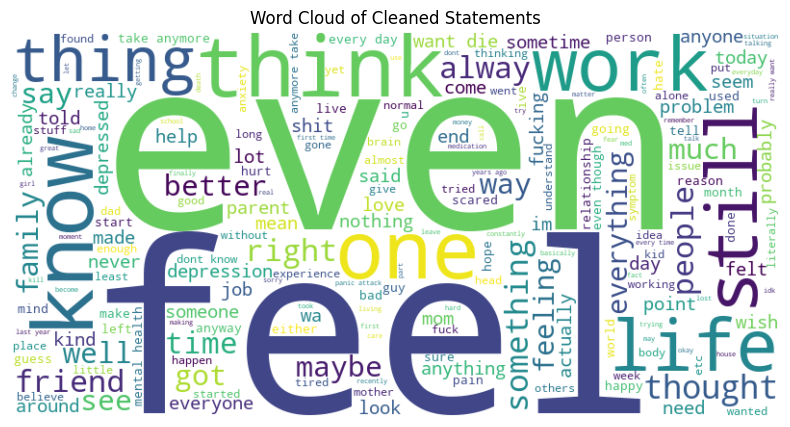

In [ ]:
# Word Cloud
all_text = ' '.join(df['cleaned_statement'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cleaned Statements')
plt.show()

In [ ]:
# Status Distribution
fig = px.pie(df, names='status', title='Proportion of Each Status Category')
fig.show()